# Creating Experiments

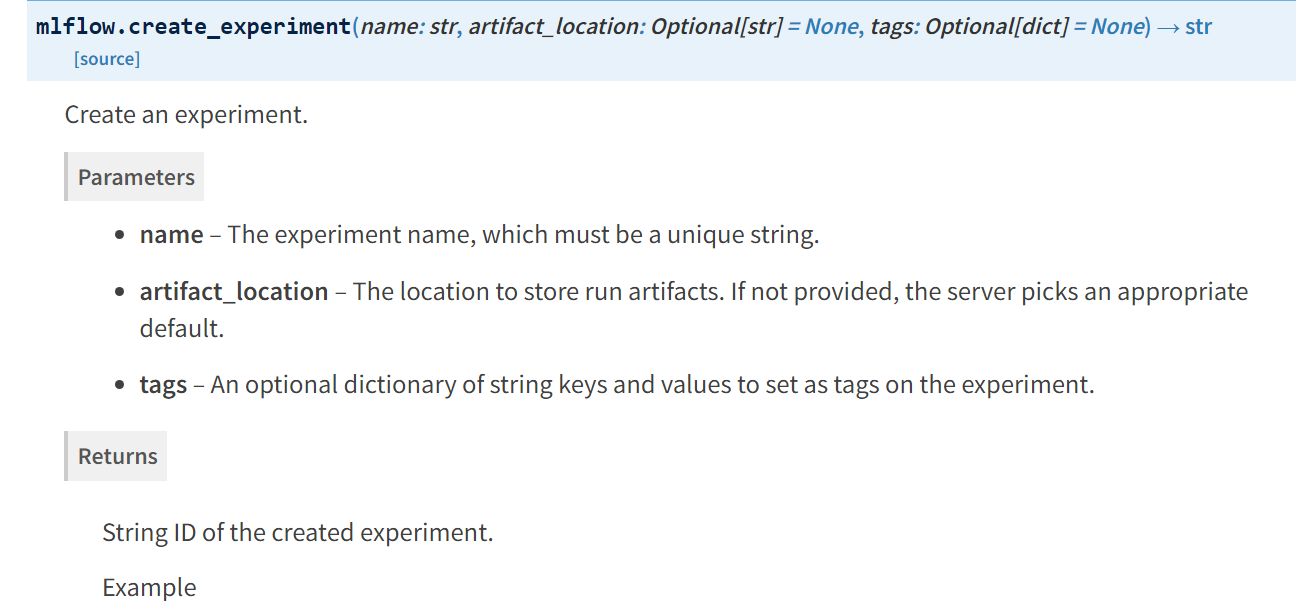

In [ ]:
import mlflow
from mlflow_for_ml_dev.src.utils.folder_operations import get_project_root

# set mlflow tracking uri
mlflow.set_tracking_uri(uri=(get_project_root() / 'mlruns').as_uri())

In [ ]:
experiment_id = mlflow.create_experiment("creating-experiments", tags={
    "topic":"experiment-management",
    "version": "v1"
})

print(f"Experiment created with ID: {experiment_id}")

**Notes**:

If the experiment name already exists, the method will throw an exception. Finally, creating the experiment using the method `create_experiment` does not mean that it will be automatically detected by other mlflow functions within the current Python context. Unless you specify the experiment ID, the runs will be stored under the `Default` Experiment (if there is no other active experiment). Therefore, we need to specify the newly created experiment as the active experiment using `mlflow.set_experiment`.

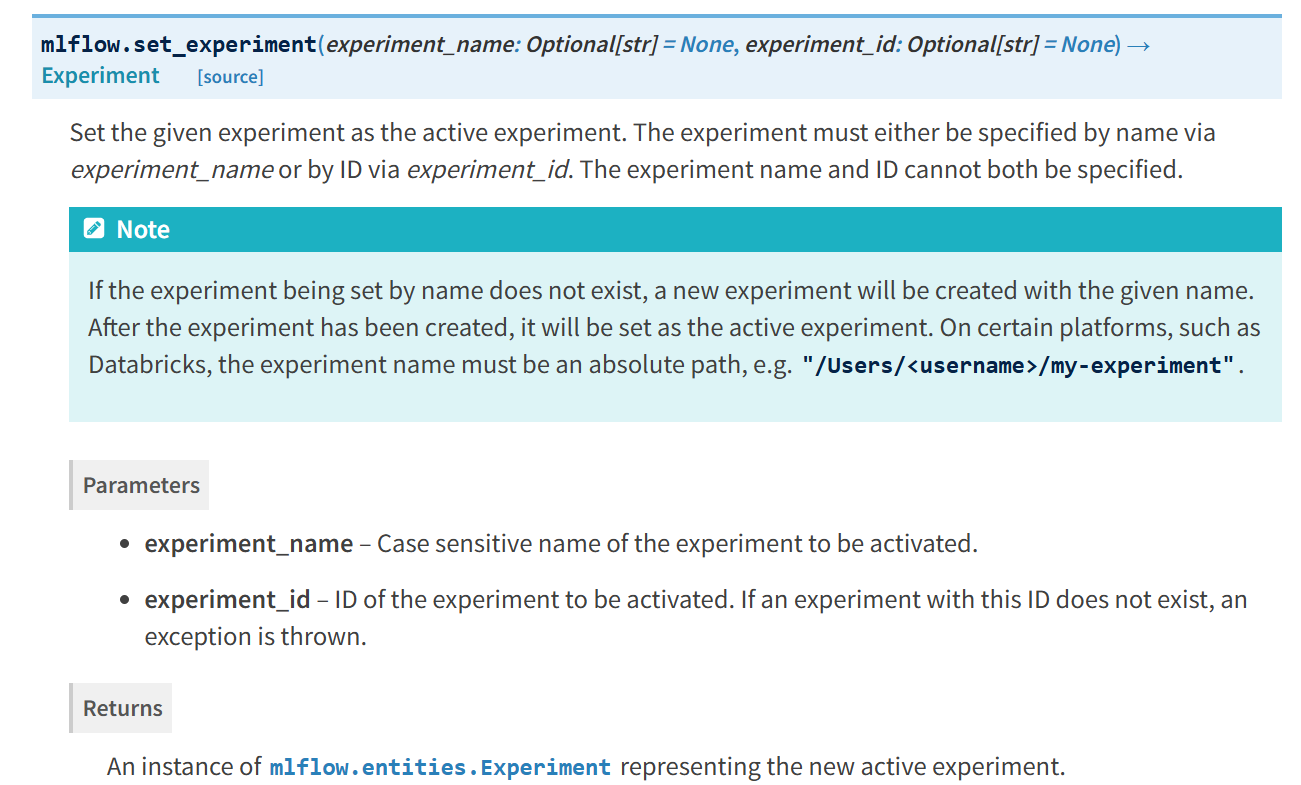

In [ ]:
# Here we start a new run without specifying the experiment_id or having called mlflow.set_experiment()
# This will create a new run in the default experiment
with mlflow.start_run() as run:
    print(f"Active run_id: {run.info.run_id}")

In [ ]:
# We set the experiment to the one we created earlier.
experiment = mlflow.set_experiment(experiment_name="creating-experiments")

In [ ]:
# Now we start a new run, this will create a new run in the experiment we set
with mlflow.start_run() as run:
    print(f"Active run_id: {run.info.run_id}")

**Notes:**

We can use `mlflow.set_experiment` to create a new experiment, if the name we are providing in the parameter `experiment_name` has not been taken by other experiments, mlflow will create a new experiment using this name, the caviat here is that we cannot provide tags or specify the artifact location for the experiments created in this way.

In [ ]:
# set the experiment
experiment = mlflow.set_experiment(experiment_name="creating-experiments-new")

In [ ]:
experiment.experiment_id

In [ ]:
# set the experiment
experiment = mlflow.set_experiment(experiment_id=experiment.experiment_id+"5")